<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/Monte_Carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def normfun(x, mu, sigma):
 pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
 return pdf

In [4]:
result = np.random.normal(0, 1, 10000)
print(result)

[-0.06561821  2.03106697 -0.72166237 ...  0.20716267  0.18247229
  0.36795156]


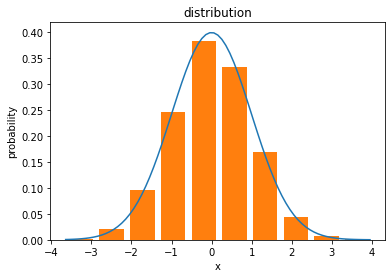

In [5]:
x = np.arange(min(result), max(result), 0.1)
y = normfun(x, result.mean(), result.std())
plt.plot(x, y)
plt.hist(result, bins=10, rwidth=0.8, density=True)
plt.title('distribution')
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

添加参数

In [21]:
N1=100000
N2=250
S=100
a=np.ones(N1)
S0=S*a
T=365/365
t_delta=T/N2
mu=0.1
r=0.1
sigma=0.3
K=100

In [22]:
St=np.zeros((N1,N2))
print(St)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
St.shape[0]

100000

In [24]:
St.shape[1]

250

In [25]:
St[:,0]=S0

In [26]:
St

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.]])

In [30]:
for i in range(0,N1):
  # c=np.random.normal(0, 1, N2)
  result = np.random.normal(0, 1, 10000)
  for t in range(1,N2):
    St[i,t]=St[i,t-1]+mu*St[i,t-1]*t_delta+sigma*St[i,t-1]*math.sqrt(t_delta)*result[t]


In [31]:
St

array([[100.        , 103.86105901, 104.25660778, ...,  80.30864729,
         79.52577282,  80.85016366],
       [100.        ,  95.82057654,  99.04525025, ..., 129.66289396,
        129.02351801, 127.77201172],
       [100.        , 102.13489015, 103.36939001, ..., 161.18213546,
        160.36519331, 156.96700331],
       ...,
       [100.        , 101.38348766, 101.30122914, ...,  76.86658235,
         75.65124015,  74.69445365],
       [100.        ,  98.22650699, 100.31020828, ..., 170.2000658 ,
        168.73901874, 169.73596862],
       [100.        ,  98.21576721,  98.41042234, ...,  94.25941914,
         91.32112023,  89.53446703]])

In [32]:
x = np.arange(0,250,1)
y = St

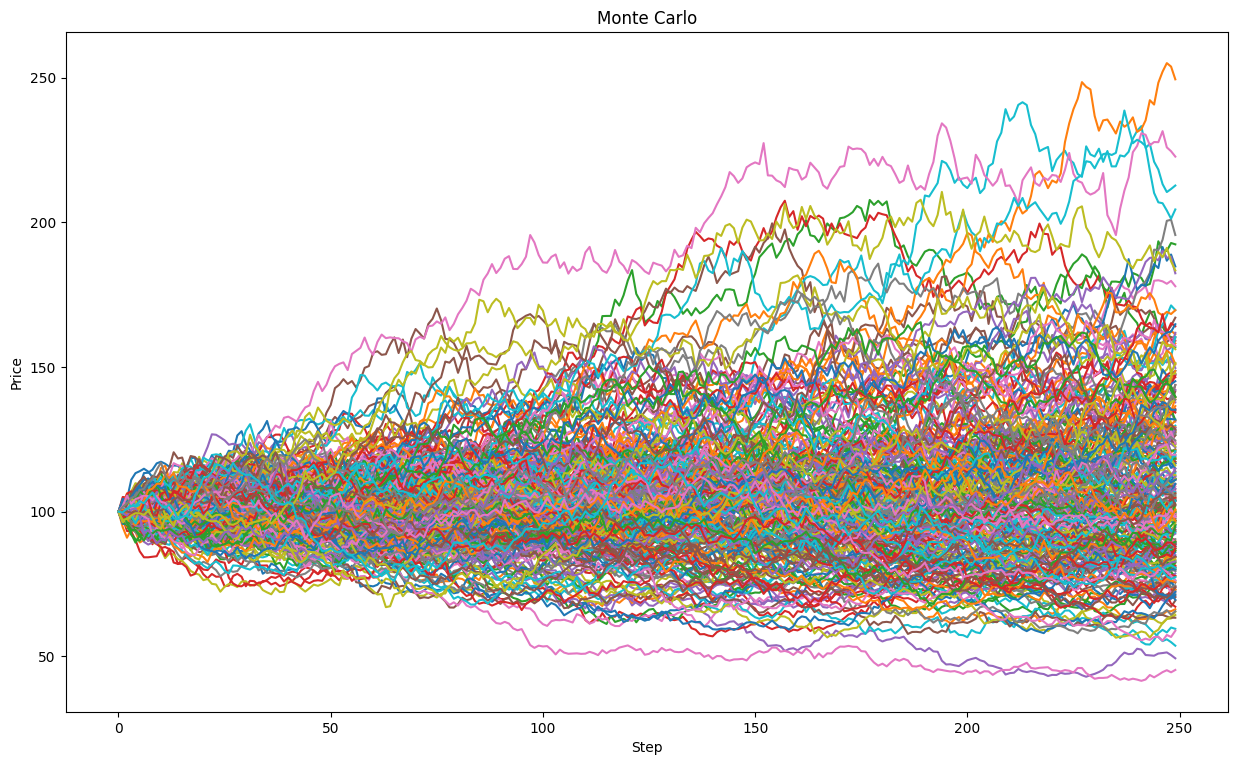

In [41]:
plt.subplots(figsize=(15,9),dpi=100)
for i in range(0,N2):
  plt.plot(x, y[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')

In [34]:
sum=0
for i in range(0,N1):
  sum=sum+max(K-St[i,N2-1],0)
PutMC=sum/N1*math.exp(-r*T)

In [35]:
PutMC

7.221710494500584

In [36]:
sum=0
for i in range(0,N1):
  sum=sum+max(St[i,N2-1]-K,0)
CallMC=sum/N1*math.exp(-r*T)

In [38]:
CallMC

16.652169812633165